In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import cycle

from gensim.models import Word2Vec
import gensim.downloader as api

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

In [39]:
data = pd.read_csv("../data/tweets_prices.csv", index_col=0, parse_dates=[0])
tweets = data.loc[data["text"].notna()].copy()
len(tweets)

526890

In [40]:
tweets

,open,close,high,low,marketVolume,id,text,favorite_count,retweet_count,user,screen_name,cleaned_text
2019-03-15 13:00:00+00:00,282.89,277.00,283.64,276.66,641274.60,1.106282e+18,@Tesla Design it to be the perfect looking car...,0.0,0.0,katherine,katherine828,tesla design perfect looking car hey thief get...
2019-03-15 13:00:00+00:00,282.89,277.00,283.64,276.66,641274.60,1.106282e+18,@Seanmmvi @Erdayastronaut @Tesla @SpaceX This ...,0.0,0.0,Joseph Lustig,boadickia,seanmmvi erdayastronaut tesla spacex also comb...
2019-03-15 13:00:00+00:00,282.89,277.00,283.64,276.66,641274.60,1.106282e+18,Amazing! I wish $AAPL would do the same in the...,0.0,0.0,Titus Pacis,TitusPacis,amazing wish aapl would software updates oppos...
2019-03-15 13:00:00+00:00,282.89,277.00,283.64,276.66,641274.60,1.106282e+18,@Tesla Wow. The S3XY family will be complete. ...,0.0,0.0,Lukas,Lukas94597338,tesla wow family complete looking forward
2019-03-15 13:00:00+00:00,282.89,277.00,283.64,276.66,641274.60,1.106282e+18,It's time to call it a night. I'm tired after ...,0.0,0.0,",`,",anna88058347,time call night tired reading post gon na sleep
2019-03-15 13:00:00+00:00,282.89,277.00,283.64,276.66,641274.60,1.106282e+18,Tesla to unveil Model Y SUV as electric vehicl...,0.0,0.0,Manfred Rosenberg,4PawShop,tesla unveil model suv electric vehicle compet...
2019-03-15 13:00:00+00:00,282.89,277.00,283.64,276.66,641274.60,1.106282e+18,@28delayslater @m40dotcom @Tesla @ValueAnalyst...,0.0,0.0,John Edward Garcia,JohnEG78,tesla earl ever think loved
2019-03-15 13:00:00+00:00,282.89,277.00,283.64,276.66,641274.60,1.106282e+18,@Tesla I hate you... but I love you you so dam...,0.0,0.0,The Duke,lilrakus,tesla hate love damn much
2019-03-15 13:00:00+00:00,282.89,277.00,283.64,276.66,641274.60,1.106282e+18,@gwestr @AlexRoy144 please take your Tesla up ...,0.0,0.0,Erik,EMCP_,gwestr please take tesla hwy skyline behind te...
2019-03-15 13:00:00+00:00,282.89,277.00,283.64,276.66,641274.60,1.106282e+18,@teslainventory @Tesla @elonmusk Powerwall can...,0.0,0.0,Christian,ElChrisFromLA,teslainventory tesla elonmusk powerwall sustai...


## Preprocessing

In [41]:
tweets['profit'] = tweets['close'] - tweets['open']

In [42]:
tweets['profit'] = tweets.groupby(tweets.index).agg("mean")['profit'].shift(1)
tweets['profit'] = tweets['profit'].bfill()

In [43]:
tweets = tweets.drop(["favorite_count", "retweet_count", "id"], axis=1)

In [44]:
tweets["cleaned_text"] = tweets["cleaned_text"].apply(str)

In [45]:
tweets.head()

,open,close,high,low,marketVolume,text,user,screen_name,cleaned_text,profit
2019-03-15 13:00:00+00:00,282.89,277.0,283.64,276.66,641274.6,@Tesla Design it to be the perfect looking car...,katherine,katherine828,tesla design perfect looking car hey thief get...,-5.89
2019-03-15 13:00:00+00:00,282.89,277.0,283.64,276.66,641274.6,@Seanmmvi @Erdayastronaut @Tesla @SpaceX This ...,Joseph Lustig,boadickia,seanmmvi erdayastronaut tesla spacex also comb...,-5.89
2019-03-15 13:00:00+00:00,282.89,277.0,283.64,276.66,641274.6,Amazing! I wish $AAPL would do the same in the...,Titus Pacis,TitusPacis,amazing wish aapl would software updates oppos...,-5.89
2019-03-15 13:00:00+00:00,282.89,277.0,283.64,276.66,641274.6,@Tesla Wow. The S3XY family will be complete. ...,Lukas,Lukas94597338,tesla wow family complete looking forward,-5.89
2019-03-15 13:00:00+00:00,282.89,277.0,283.64,276.66,641274.6,It's time to call it a night. I'm tired after ...,",`,",anna88058347,time call night tired reading post gon na sleep,-5.89


In [21]:
to_categorical(tweets.up)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Załadujemy poniżej 50-wymiarowe wektory reprezentujące każde słowo. Możemy też użyć więcej wymiarowych wektorów (np. 100 zamiast 50), ale zajmą wtedy one 2 razy więcej miejsca (te zajmują 200 MB).

In [46]:
glove_vectors = api.load("glove-twitter-50")  # may take a while

In [47]:
GLOVE_SIZE = 50

In [48]:
def get_vector(word):
    """For a given word returns it's vector representation to be fed into model"""
    try:
        vec = glove_vectors.get_vector(word)
    except KeyError:
        vec = np.random.normal(0, 0.0001, 50)  # we don't want it to be all zeros, because all zeros vectors will be masked (ignored)
    return vec

In [62]:
get_vector("tomasz")

array([-0.33098 ,  0.0379  , -0.42753 , -0.65001 , -1.2717  , -0.47359 ,
       -1.4841  , -0.71542 , -0.49465 , -0.66511 , -0.14001 ,  0.74547 ,
        0.051194,  0.11453 ,  0.062916, -0.21067 ,  0.3178  ,  0.38291 ,
        0.4446  , -0.21756 ,  0.050394, -0.33239 ,  0.30192 , -1.1399  ,
       -0.46131 ,  0.73493 , -0.033231,  0.88808 ,  0.49161 ,  0.070955,
        1.2324  ,  0.27553 , -0.18877 , -0.60307 , -0.53437 , -0.026699,
        1.1071  ,  0.66184 ,  0.43216 , -0.043162,  1.0749  , -0.26895 ,
        0.97814 ,  0.49748 , -0.86726 ,  0.49877 , -1.0372  , -0.35928 ,
        0.1627  ,  0.071377], dtype=float32)

In [63]:
tweets.profit.values.reshape(-1, 1)

array([[-5.89],
       [-5.89],
       [-5.89],
       ...,
       [-1.44],
       [-1.44],
       [-1.44]])

In [69]:
def train_generator(tweets, batch_size):
    """Generates data form tweets in batches of size batch_size"""
        
    sentences = [sentence.split(" ") for sentence in tweets["cleaned_text"]]
    labels = tweets.profit.values.reshape(-1, 1)
    
    max_len = max([len(sentence) for sentence in sentences])
    
    x_train = np.zeros((batch_size, max_len, GLOVE_SIZE))
    y_train = np.zeros((batch_size, 1))
    i = 0
    for sentence, label in cycle(zip(sentences, labels)):
        for j, word in enumerate(sentence):
            x_train[i, j, :] = get_vector(word)
        y_train[i, :] = label
        if i == batch_size - 1:
            i = 0
            yield x_train, y_train
        else:
            i += 1

In [70]:
tweets.head()
# tweets = tweets.set_index('data')

,open,close,high,low,marketVolume,text,user,screen_name,cleaned_text,profit
2019-03-15 13:00:00+00:00,282.89,277.0,283.64,276.66,641274.6,@Tesla Design it to be the perfect looking car...,katherine,katherine828,tesla design perfect looking car hey thief get...,-5.89
2019-03-15 13:00:00+00:00,282.89,277.0,283.64,276.66,641274.6,@Seanmmvi @Erdayastronaut @Tesla @SpaceX This ...,Joseph Lustig,boadickia,seanmmvi erdayastronaut tesla spacex also comb...,-5.89
2019-03-15 13:00:00+00:00,282.89,277.0,283.64,276.66,641274.6,Amazing! I wish $AAPL would do the same in the...,Titus Pacis,TitusPacis,amazing wish aapl would software updates oppos...,-5.89
2019-03-15 13:00:00+00:00,282.89,277.0,283.64,276.66,641274.6,@Tesla Wow. The S3XY family will be complete. ...,Lukas,Lukas94597338,tesla wow family complete looking forward,-5.89
2019-03-15 13:00:00+00:00,282.89,277.0,283.64,276.66,641274.6,It's time to call it a night. I'm tired after ...,",`,",anna88058347,time call night tired reading post gon na sleep,-5.89


In [102]:
tweets_train = tweets[:"2019-05-05"]
tweets_test = tweets['2019-05-06':]
y_train = tweets[:"2019-05-05"].profit
y_test = tweets['2019-05-06':].profit
# tweets_train, tweets_test, y_train, y_test = train_test_split(tweets, tweets.up, test_size=0.10, random_state=43)

In [103]:
y_test.mean(), y_train.mean(), y_train.shape, y_test.shape

(-0.39748198543069424, -1.4549745244208183, (298325,), (228565,))

# Model

In [104]:
model = Sequential()

model.add(Masking(mask_value=0., input_shape=(None, 50)))

# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(16, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1))
# model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='mse')

# Create callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=10), ModelCheckpoint('model.h5', save_best_only=True, save_weights_only=False)]

model.fit_generator(train_generator(tweets_train, 1000), 
                    validation_data=train_generator(tweets_test, 100), 
                    steps_per_epoch=50, 
                    validation_steps=50, 
                    epochs=10,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/10
50/50 [==============================] - 10s 199ms/step - loss: 17.0598 - val_loss: 5.2670
Epoch 2/10
50/50 [==============================] - 7s 145ms/step - loss: 3.7216 - val_loss: 2.5265
Epoch 3/10
50/50 [==============================] - 8s 151ms/step - loss: 3.5039 - val_loss: 4.5974
Epoch 4/10
50/50 [==============================] - 7s 147ms/step - loss: 14.4498 - val_loss: 5.3227
Epoch 5/10
50/50 [==============================] - 7s 149ms/step - loss: 4.2888 - val_loss: 7.0194
Epoch 6/10
50/50 [==============================] - 9s 173ms/step - loss: 18.0517 - val_loss: 2.2392
Epoch 7/10
50/50 [==============================] - 9s 184ms/step - loss: 14.8495 - val_loss: 1.1657
Epoch 8/10
50/50 [==============================] - 8s 164ms/step - loss: 3.2608 - val_loss: 0.4855
Epoch 9/10
50/50 [==============================] - 8s 166ms/step - loss: 3.1852 - val_loss: 0.5140
Epoch 10/10
50/50 [==============================] - 8s 167ms/step - loss: 14.8968 - val_loss: 

In [150]:
model.save(filepath='my_model.h5')

In [106]:
sentences = [sentence.split(" ") for sentence in tweets_test['cleaned_text']]
labels = tweets_test.profit.values.reshape(-1, 1)

max_len = max([len(sentence) for sentence in sentences])

predicted=[]
true=[]
for i in range(len(tweets_test)):
    x_to_predict = np.zeros((1, max_len, GLOVE_SIZE))
    y = 0

    for j, word in enumerate(sentences[i]):
        x_to_predict[0, j, :] = get_vector(word)
    y = labels[i]
    predicted.append(model.predict(x_to_predict)[0][0])
    true.append(y)

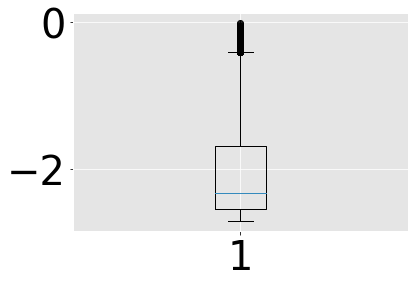

In [107]:
import matplotlib.pyplot as plt
plt.boxplot(predicted)
plt.show()

AUC: 0.507


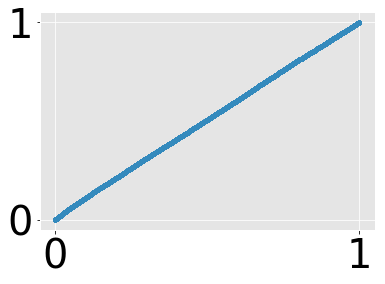

In [108]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

auc = roc_auc_score(np.array(true) > 0 , predicted)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(np.array(true) > 0, predicted)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [109]:
max(predicted)

-0.018415634

In [110]:
true = np.array(true)

In [111]:
tweets_test['pred'] = predicted

C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [146]:
pred = tweets_test.groupby(tweets_test.index)['pred'].apply(lambda x: x.())

In [147]:
true = tweets_test.groupby(tweets_test.index)['profit'].mean()

In [148]:
auc = roc_auc_score((np.array(true) > 0)[1:] , pred[:-1])

In [149]:
auc

0.45354239256678286

In [116]:
true.shape

(84,)

AUC: 0.448


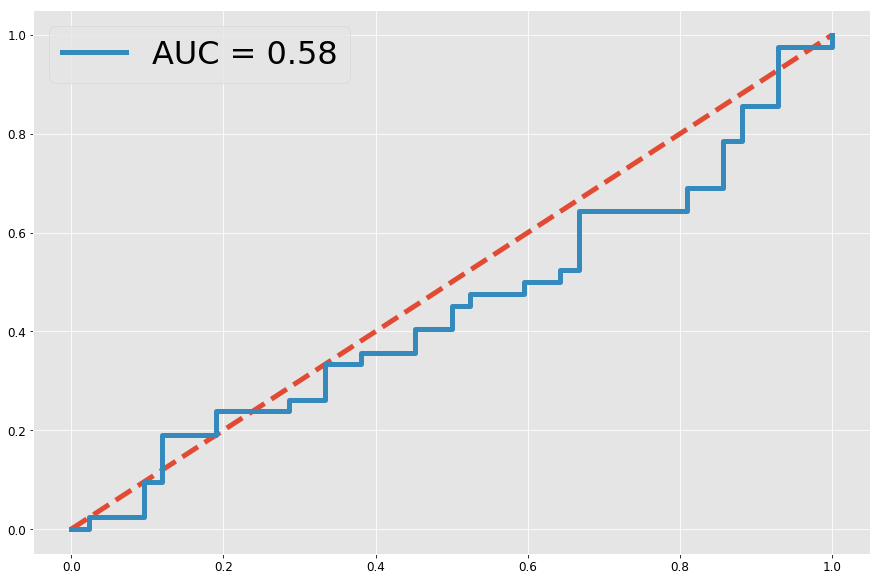

In [117]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

COLOR = 'black'

plt.style.use('ggplot')
plt.figure(figsize=(15,10))
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(np.array(true) > 0, pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=5)
# plot the roc curve for the model
plt.plot(fpr, tpr, label="AUC = 0.58", linewidth=5)
# plt.legend(fontsize=32, facecolor="black")

# #plt.xaxis.label.set_color('white')
# plt.tick_params(colors='white', labelsize=40)
# plt.rcParams['font.size'] = 40
# plt.rcParams['text.color'] = COLOR
# plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['xtick.color'] = COLOR
# plt.rcParams['ytick.color'] = COLOR
# plt.savefig('auc_models.png', transparent=True, pad_inches=2, bbox_inches = 'tight', dpi=300)

plt.legend(fontsize=32)
#plt.xaxis.label.set_color('white')
plt.tick_params(colors='black', labelsize=12)
plt.rcParams['font.size'] = 40
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.savefig('auc_models.png', transparent=False, pad_inches=2, bbox_inches = 'tight', dpi=300)

In [134]:
pred.mean()

-2.1078964048623083

In [135]:
true[pred < -2.35].mean()

nan

In [136]:
true.sum()

-14.790000000003744

In [137]:
true.mean()

-0.17607142857147312